In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
import warnings

# Data Collection

In [2]:
data_raw = pd.read_csv("anemia.csv")
data_raw.head(15)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0
9,1,14.9,25.8,31.3,82.9,0


In [3]:
data_raw.info()
data_raw.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


Gender        1421
Hemoglobin    1421
MCH           1421
MCHC          1421
MCV           1421
Result        1421
dtype: int64

# Data Cleaning

In [4]:
print("There is {} duplicated values in data frame".format(data_raw.duplicated().sum()))
print("Data columns with null value: \n{} ".format(data_raw.isnull().sum()))

There is 887 duplicated values in data frame
Data columns with null value: 
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64 


In [5]:
duplicated = data_raw[data_raw.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['Gender', "Hemoglobin", "MCH",'MCHC','MCV',"Result"], ascending= False) 
duplicated.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
115,1,16.9,24.2,32.1,92.5,0
352,1,16.9,24.2,32.1,92.5,0
589,1,16.9,24.2,32.1,92.5,0
138,1,16.8,24.3,30.5,90.7,0
375,1,16.8,24.3,30.5,90.7,0


In [6]:
data_raw.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(data_raw.duplicated().sum()))

print("There is {} missing values in data frame".format(data_raw.isnull().sum().sum()))

There is 0 duplicated values in data frame
There is 0 missing values in data frame


In [7]:
x = data_raw.copy(deep=True)
print(x.describe())

           Gender  Hemoglobin         MCH        MCHC         MCV      Result
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean     0.522472   13.287079   22.911985   30.249438   85.647004    0.462547
std      0.499963    2.066276    3.948482    1.412312    9.604934    0.499063
min      0.000000    6.600000   16.000000   27.800000   69.400000    0.000000
25%      0.000000   11.600000   19.500000   29.000000   77.325000    0.000000
50%      1.000000   13.100000   22.750000   30.400000   85.450000    0.000000
75%      1.000000   14.975000   26.100000   31.475000   94.150000    1.000000
max      1.000000   16.900000   30.000000   32.500000  101.600000    1.000000


In [8]:
s_list = ["Gender", "Hemoglobin", "MCH", "MCHC", "MCV"]
res = "Result"
warnings.filterwarnings('ignore')
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
print(x_std.head())

     Gender  Hemoglobin       MCH      MCHC       MCV  Result
0  0.955127    0.780594 -0.053688 -0.813870 -0.202709       0
1 -1.045021    1.264556  0.630119 -1.380317 -1.420833       0
2 -1.045021   -2.074785 -0.357602 -0.459841 -1.504123       1
3 -1.045021    0.780594 -1.750542  0.814666  0.192921       0
4  0.955127    0.683801 -0.230971 -1.451123  1.442279       0


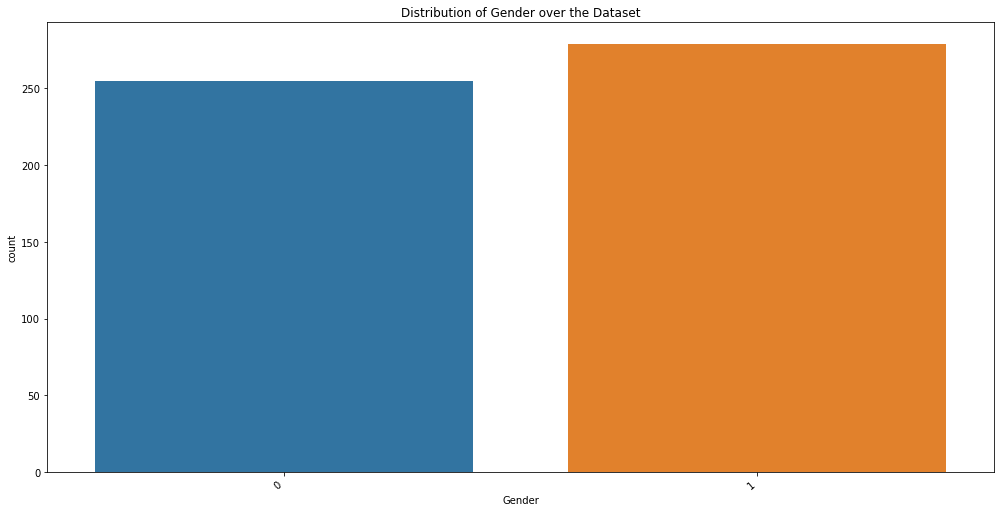

In [9]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x="Gender", data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.rcParams["xtick.labelsize"] = 20
plt.title ("Distribution of Gender over the Dataset")
plt.show()

# Gender: 0 - male, 1 - female

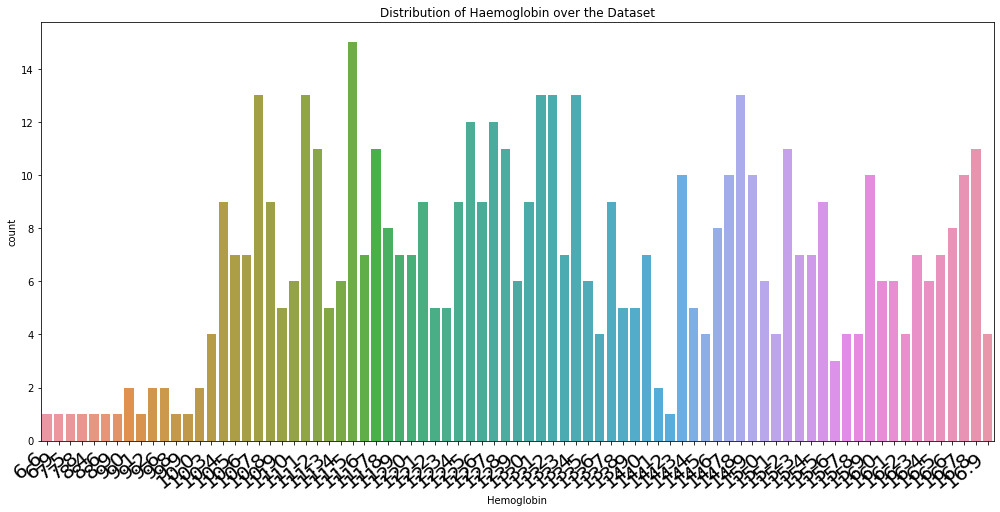

In [10]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x="Hemoglobin", data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.rcParams["xtick.labelsize"] = 7
plt.title ("Distribution of Haemoglobin over the Dataset")
plt.show()

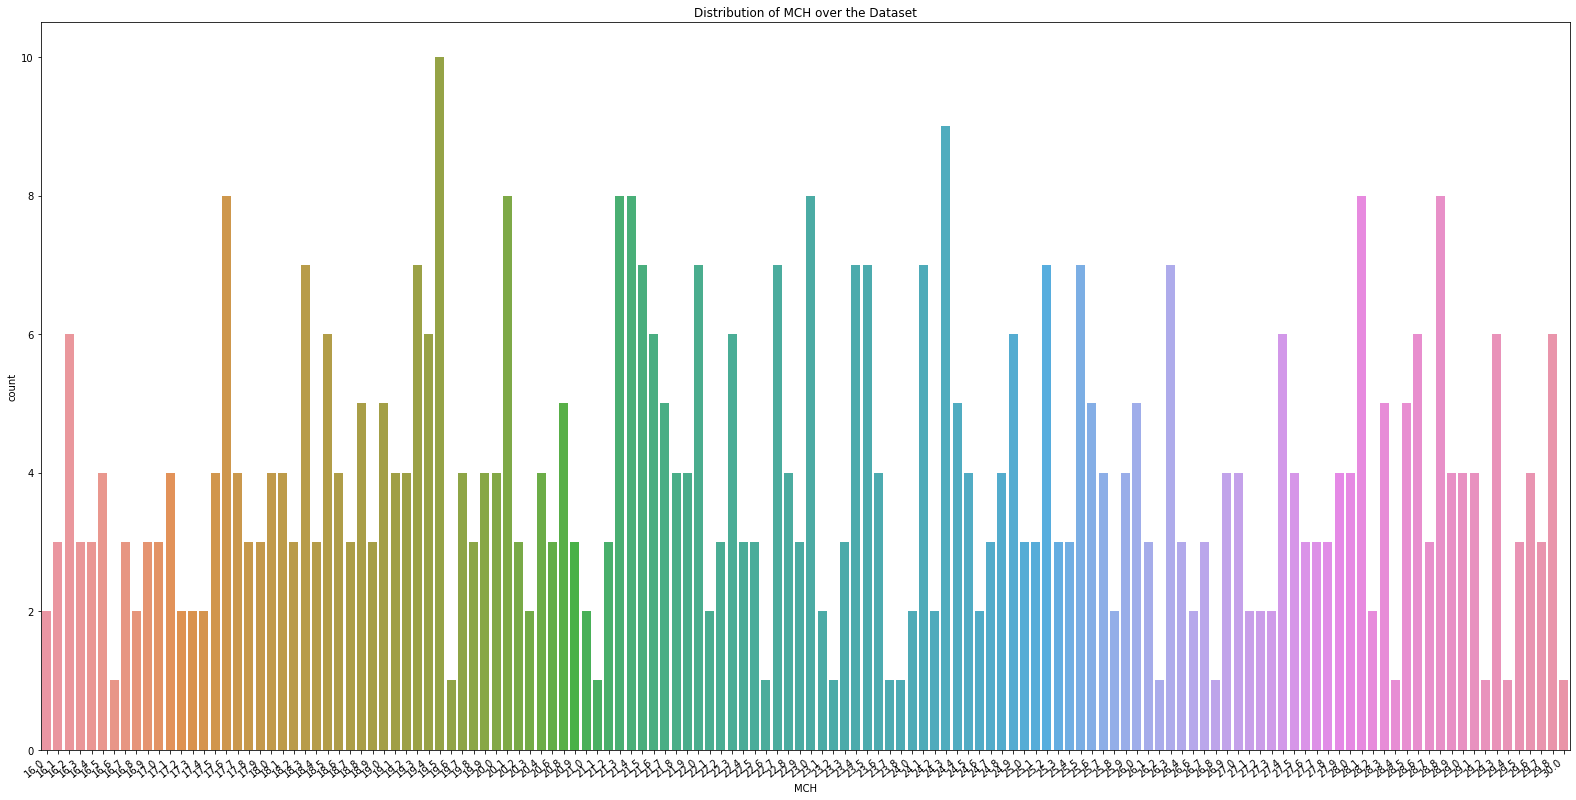

In [11]:
plt.figure(figsize=(22,11))
ax = sns.countplot(x="MCH", data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.tight_layout()
plt.title ("Distribution of MCH over the Dataset")
plt.show()

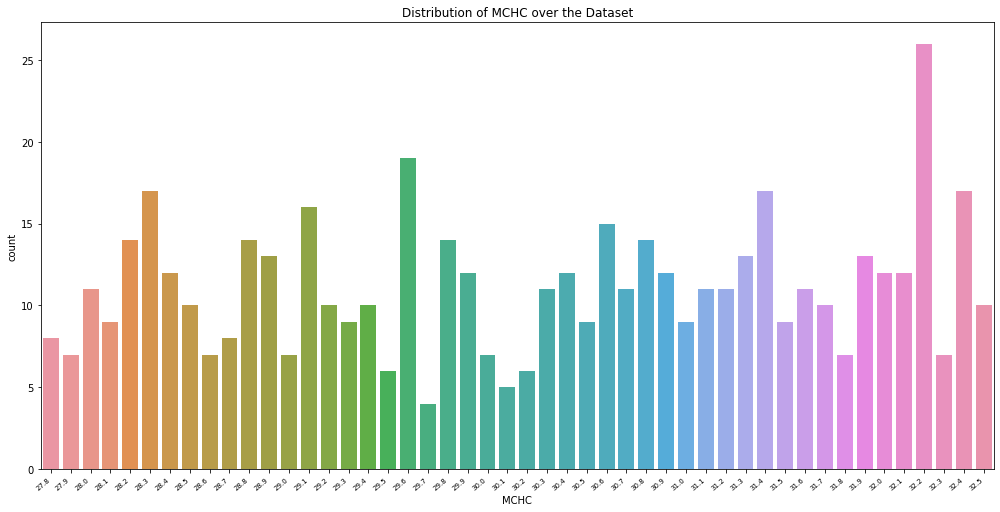

In [12]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x="MCHC", data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.rcParams["xtick.labelsize"] = 8
plt.title ("Distribution of MCHC over the Dataset")
plt.show()

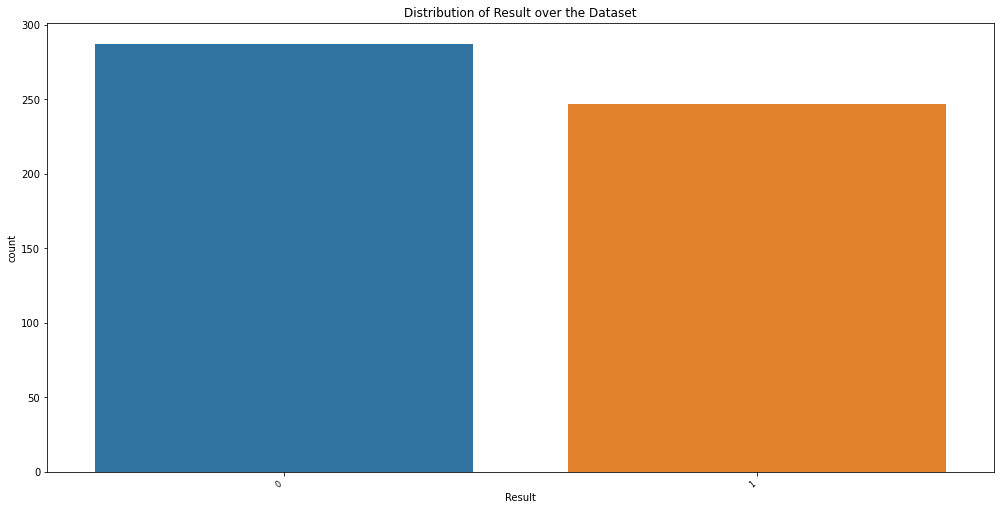

In [13]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x="Result", data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.rcParams["xtick.labelsize"] = 8
plt.title ("Distribution of Result over the Dataset")
plt.show()

# Results: 0- not anemic, 1-anemic

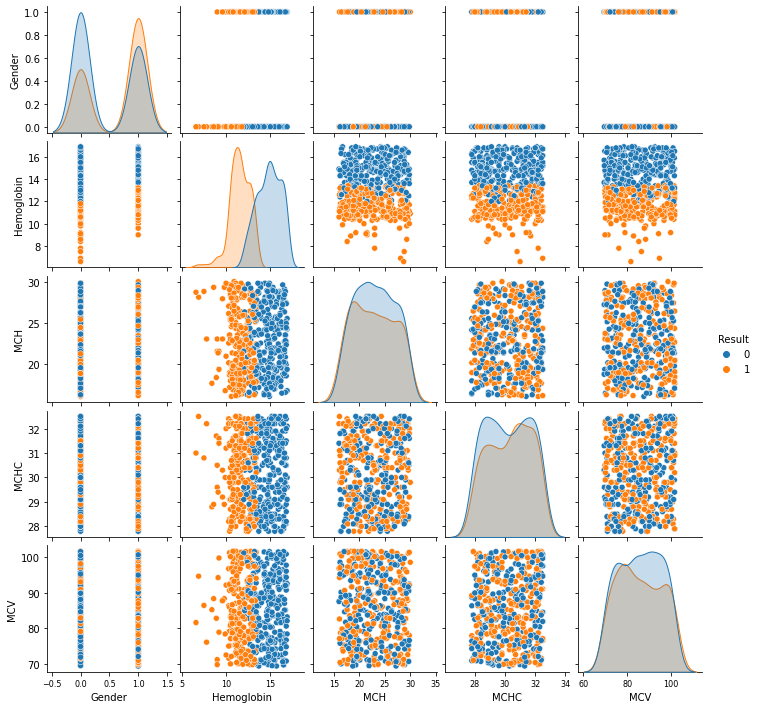

In [14]:
sns.pairplot(x, hue="Result", diag_kind= 'kde',size=2)

<AxesSubplot:xlabel='Features', ylabel='Value'>

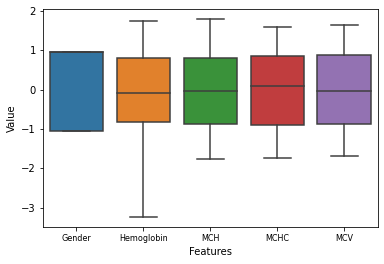

In [15]:
x_melted = pd.melt(frame=x_std, id_vars="Result", value_vars=s_list, var_name="Features", value_name="Value", col_level=None)
sns.boxplot(x="Features", y="Value", data=x_melted)

<AxesSubplot:xlabel='Features', ylabel='Value'>

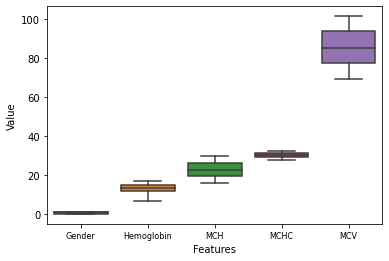

In [16]:
x_melted = pd.melt(frame=x, id_vars="Result", value_vars=s_list, var_name="Features", value_name="Value", col_level=None)
sns.boxplot(x="Features", y="Value", data=x_melted)

In [17]:
y = x["Result"]
y.shape
x.drop("Result", axis=1,inplace=True)
x.head()
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [18]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction=logistic.predict(x_test)
a=logistic.decision_function(x_test)
print(prediction)
accuracy_scorelr = accuracy_score(y_test, prediction)
print("Logistic Regression:" ,accuracy_scorelr )

[1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0]
Logistic Regression: 0.9813084112149533


# Decision Tree

In [19]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
dt_pred = decision.predict(x_test)
print(dt_pred)
accuracy_scoredt= accuracy_score(y_test, dt_pred)
print("Decision Tree:", accuracy_scoredt)

[1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0]
Decision Tree: 0.9158878504672897


# Random Forest

In [20]:
random = RandomForestClassifier(n_estimators=100)
random.fit(x_train,y_train)
ran_pred = random.predict(x_test)
print(ran_pred)
accuracy_scorerf = accuracy_score(y_test, ran_pred)
print("Random Forest :", accuracy_scorerf)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0]
Random Forest : 0.9345794392523364


# KNeigbours Classifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(knn_pred)
accuracy_scoreknn = accuracy_score(y_test, knn_pred)
print("KNeighborsClassifier :", accuracy_scoreknn)

[1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0]
KNeighborsClassifier : 0.8504672897196262


In [23]:
print("Logistic Regression   ",accuracy_scorelr )
print("Decision Tree:        ",accuracy_scoredt)
print("Random Forest :       ", accuracy_scorerf)
print("KNeighborsClassifier :", accuracy_scoreknn)

Logistic Regression    0.9813084112149533
Decision Tree:         0.9158878504672897
Random Forest :        0.9345794392523364
KNeighborsClassifier : 0.8504672897196262


# Modal Evaluation

In [24]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=random, X=x_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)
accuracies_lg = cross_val_score(estimator=logistic, X=x_train, y=y_train, cv=10)

print("Random Forest Average accuracy:       ", accuracies_random_forest.mean())
print("Random Forest Standard Deviation:     ", accuracies_random_forest.std())
print("KNN Average accuracy:                 ", accuracies_knn.mean())
print("KNN Standart Deviation:               ", accuracies_knn.std())
print("Logistic Regression:                  ", accuracy_scorelr.mean())
print("Logistic Regression Standard deviation", accuracies_lg.std())

Random Forest Average accuracy:        0.9507751937984497
Random Forest Standard Deviation:      0.03692414496727671
KNN Average accuracy:                  0.8431339977851605
KNN Standart Deviation:                0.05630554072277283
Logistic Regression:                   0.9813084112149533
Logistic Regression Standard deviation 0.03592928495002778


# ROC AUC Characteristics

In [25]:
fpr1, tpr1, thresh1 = roc_curve(y_test, dt_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, ran_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, knn_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, a, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, dt_pred)
auc_score2 = roc_auc_score(y_test, ran_pred)
auc_score3 = roc_auc_score(y_test, knn_pred)
auc_score4 = roc_auc_score(y_test, a)

print("AUC-ROC curve for Logistic Regression  ", auc_score4)
print("AUC-ROC curve for Decision Tree        ", auc_score1)
print("AUC-ROC curve for Random Forest        ", auc_score2)
print("AUC-ROC curve for KNeigbours Classifier", auc_score3)

AUC-ROC curve for Logistic Regression   0.9996436208125445
AUC-ROC curve for Decision Tree         0.9235566642908054
AUC-ROC curve for Random Forest         0.9399501069137562
AUC-ROC curve for KNeigbours Classifier 0.8394511760513187


# Confusion Matrix

Test accuracy:  0.9626168224299065


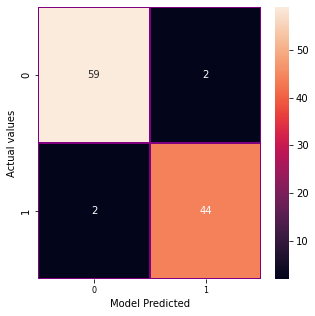

In [26]:
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))

y_true = y_test
y_pred = logreg_best.predict(x_test)

cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Model Predicted")
plt.ylabel("Actual values")
plt.show()

# Classification Report

In [27]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred, normalize = True)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        61
           1       0.96      0.96      0.96        46

    accuracy                           0.96       107
   macro avg       0.96      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107



In [28]:
# Model Prediciton over new set of values

In [29]:
new_patients = {'Gender':[0,1,1,1,0,1],
                'Haemoglobin':[6.9,11.8,11,11,10.7,16.2],
                'MCH': [28.1,16.3,26,25.2,21.3,17.2],
                'MCHC': [32.5,30.9,32.2,30.9,29.1,32.2],
                'MCV' : [94.6,78.7,98.9,83.2,78.7,78.4]}
df2 = pd.DataFrame(new_patients,columns=['Gender','Haemoglobin','MCH','MCHC','MCV'])
y_pred=logistic.predict(df2)
df2['Predicted Result'] = y_pred
print (df2)

   Gender  Haemoglobin   MCH  MCHC   MCV  Predicted Result
0       0          6.9  28.1  32.5  94.6                 1
1       1         11.8  16.3  30.9  78.7                 1
2       1         11.0  26.0  32.2  98.9                 1
3       1         11.0  25.2  30.9  83.2                 1
4       0         10.7  21.3  29.1  78.7                 1
5       1         16.2  17.2  32.2  78.4                 0
